In [ ]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

%matplotlib inline

# mac OS 에서 한글이 깨진다면 참고.
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

KMeans와 같은 군집화 방법은 단순하고 강력한 방법이지만 군집의 모양이 원형이 아닌 경우에는 잘 작동하지 않으며 군집의 개수를 사용자가 직접 지정해주어야 한다는 단점이 있다.



DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 군집화 방법은 데이터의 밀도를 기반으로 군집화 하는 알고리즘으로서 군집의 개수를 사용자가 지정할 필요가 없다는 장점이 있다.  
또한,  군집의 형태에 구애받지 않아 복잡한 기하학적 분포를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.

# 1) 가상 데이터로 실습하기

## 1.1 가상 데이터 생성

In [ ]:
# 복잡한 형태의 데이터를 생성하기 위해 make_moons를 사용해보자
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=300, noise=0.09, random_state=0)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


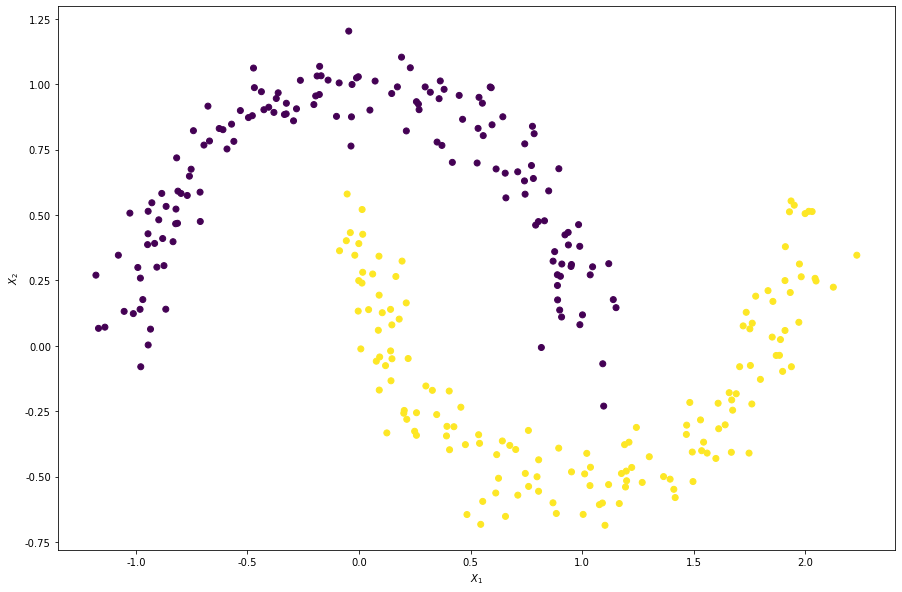

In [ ]:
# 시각화로 확인해보면 데이터가 원형 모양으로 분포되어 있지 않은 것을 확인할 수 있다.
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:
# 학습을 위해 scaler를 사용하여 feature 간의 Scale을 맞춰주는 작업을 하자
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## 1.2 모델링

### DBSCAN

DBSCAN
* 주요 parameter:
 - `eps` : 이웃을 정의하기 위한 거리, 기본값은 0.5
        eps 값을 크게하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다.
 - `min_samples` : 핵심 데이터를 정의하기 위해 필요한 최소 샘플 수, 기본값은 5
        min_samples를 크게하면 주어진 eps 내에서 더 많은 데이터를 포함시켜야 핵심 데이터가 되므로 노이즈 데이터 개수가 커지게 된다.


참고 : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

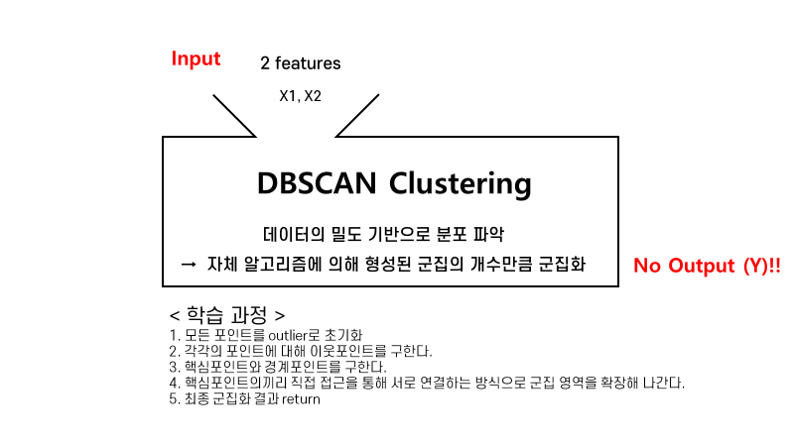

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model = DBSCAN(eps=0.3, min_samples=8)
model.fit(X_scaled)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [ ]:
# DBSCAN 군집 결과를 확인해보자
model.labels_

array([ 0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,
        1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,
        0,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,
        1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,
        0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,
        0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  1,  1,  0,
        1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1, -1,  0,  0,  1,  1,
        1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  0,  0,
        1,  1,  0,  1,  0

- labels_ 는 클러스터의 번호이다. -1의 경우에는 outlier로 핵심데이터도 아니고 경계데이터도 아닌 데이터를 말한다.

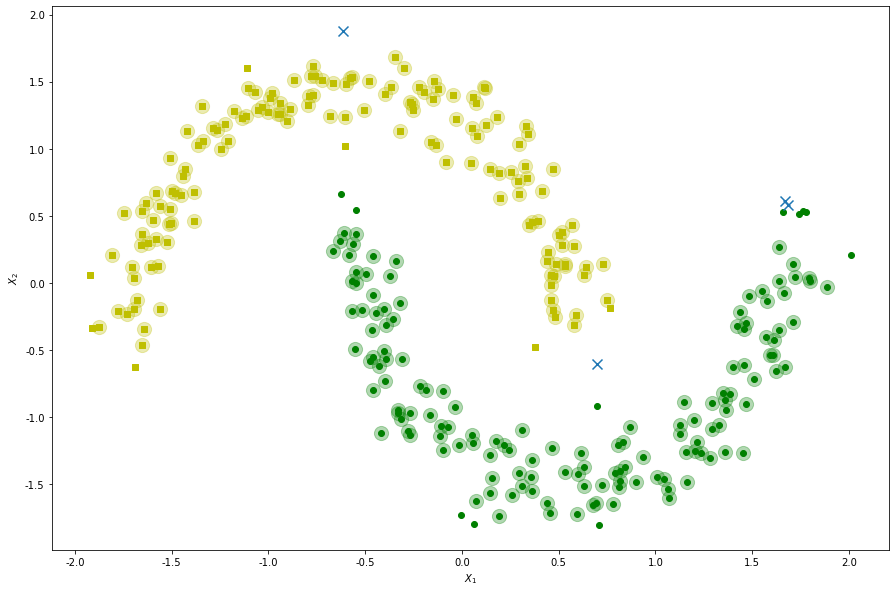

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X_scaled[model.labels_ == 0, 0], X_scaled[model.labels_ == 0, 1], marker='o', facecolor='g')
plt.scatter(X_scaled[model.labels_ == 1, 0], X_scaled[model.labels_ == 1, 1], marker='s', facecolor='y')

# outlier 표시
outlier = (model.labels_ == -1)
plt.scatter(X_scaled[outlier,0], X_scaled[outlier,1], marker = 'x', s = 100)

# 핵심데이터 표시
core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
plt.scatter(X_scaled[core_0,0], X_scaled[core_0,1], s = 200, alpha = 0.3, facecolor='g')
plt.scatter(X_scaled[core_1,0], X_scaled[core_1,1], s = 200, alpha = 0.3, facecolor='y')

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

'X'로 표시된 데이터는 outlier로 핵심데이터도 경계데이터도 아닌 데이터이다. labels_ 에서 -1 값을 가진다.

### KMeans 비교

가장 대표적인 군집화 알고리즘인 KMeans는 이처럼 기하학적인 형태의 데이터를 잘 군집화할 수 있을까?

In [ ]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=2, init="k-means++", random_state = 0)
model_kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

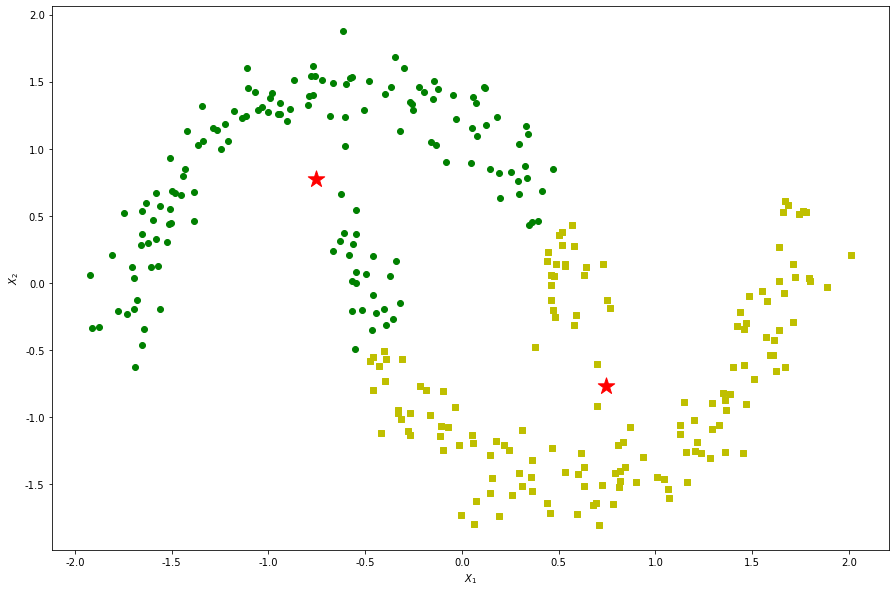

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X_scaled[model_kmeans.labels_ == 0, 0], X_scaled[model_kmeans.labels_ == 0, 1], marker='o', facecolor='g')
plt.scatter(X_scaled[model_kmeans.labels_ == 1, 0], X_scaled[model_kmeans.labels_ == 1, 1], marker='s', facecolor='y')

# 군집 중심점
center = model_kmeans.cluster_centers_
c0, c1 = center[0], center[1]
plt.scatter(c0[0], c0[1], s = 300, facecolor='r', marker = '*')
plt.scatter(c1[0], c1[1], s = 300, facecolor='r', marker = '*')

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

위, 아래 군집의 중심점을 기반으로 위와 아래 절반으로 군집화 된 것을 확인할 수 있다.  
KMeans와 같은 거리 기반의 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려우므로 DBSCAN과 같은 밀도기반의 군집화가 더욱 효과적이다.

# 2) 붓꽃 데이터로 실습하기

### 2.1 데이터 로드 및 확인

붓꽃(iris) 꽃잎, 꽃받침의 너비와 길이를 측정한 데이터이며 150개의 샘플로 구성되어 있으며 3개의 레이블 클래스를 가진다.

feature  
* `sepal length` : 꽃받침의 길이
* `sepal width` : 꽃받침의 너비
* `petal length` : 꽃잎의 길이
* `petal width` : 꽃잎의 너비


<a title="No machine-readable author provided. Dlanglois assumed (based on copyright claims)., CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg"><img width="512" alt="Iris versicolor 3" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/512px-Iris_versicolor_3.jpg"></a>  

<a href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg">No machine-readable author provided. Dlanglois assumed (based on copyright claims).</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data_iris = load_iris()

In [ ]:
# iris 데이터의 4가지 특성
data_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# iris의 데이터의 target
data_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 데이터프레임으로 확인해보자
import pandas as pd

x_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
y_iris = pd.DataFrame(data_iris.target, columns=['target'])

df_iris = pd.concat([x_iris, y_iris], axis=1)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


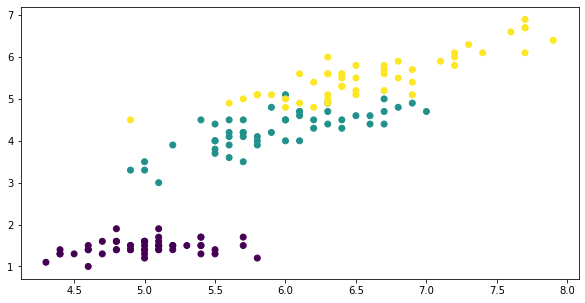

In [ ]:
# sepal length와 petal length에 따른 iris 종류를 그래프로 확인해보자.
plt.figure(figsize = (10, 5))
plt.scatter(x_iris.iloc[:, 0], x_iris.iloc[:, 2], c = data_iris.target)
plt.show()

## 2.2 모델링 및 평가

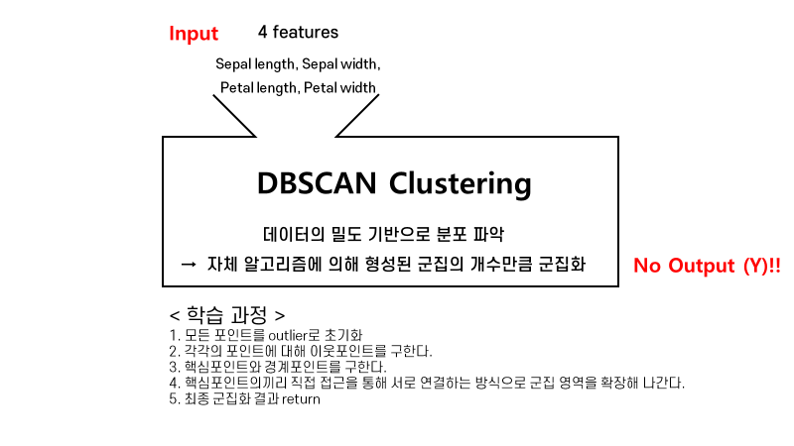

In [ ]:
from sklearn.cluster import DBSCAN

model_iris = DBSCAN(eps = 0.6, min_samples = 8)
model_iris.fit(x_iris)

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [ ]:
# 각 데이터가 어떤 클러스터에 포함되는지 확인해보자
print(model_iris.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [ ]:
# pandas 데이터프레임의 groupby 연산을 활용하여 실제 붓꽃 품종 분류값과 얼마나 차이가 나는지 확인해보자
df_iris['cluster'] = model_iris.labels_
print(df_iris.groupby(['target'])['cluster'].value_counts())

target  cluster
0        0         49
        -1          1
1        1         46
        -1          4
2        1         42
        -1          8
Name: cluster, dtype: int64


먼저 cluter 값을 살펴보면 0과 1 외의 특이하게 -1이 군집 레이블로 있는 것을 알 수 있다. 이는 outlier, 즉 노이즈에 속하는 군집을 의미하는 것이다.  
따라서 붓꽃 데이터 세트는 DBSCAN 군집화 결과 0과 1의 두 개의 군집으로 군집화 되었다.

실제 iris 데이터의 target 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어지는 것은 아니다.  
DBSCAN은 군집의 개수를 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다고 할 수 있기 때문이다.

# (심화학습)

## DBSCAN pseudocode

```
class KMeans(object):

    # epsilon 이하의 거리에 위치한 이웃 포인트를 구하는 함수
    def neighbor_points(X, 기준포인트, epsilon):
        1. 기준 포인트를 중심으로 모든 포인트에 대한 유클리디안 거리를 구한다.
        2. epsilon 이하의 거리에 있는 포인트를 이웃포인트로 저장한다.
        3. 이웃포인트 리스트 return

        
    # 학습 과정
    def fit(X):
        1. 모든 포인트롤 outlier 로 초기화
        2. 각각의 포인트에 대해 이웃 포인트를 구한다.
        3. 핵심포인트를 구한다.
            if 가지고 있는 이웃포인트의 개수가 min_samples 이상일 경우:
                핵심포인트로 저장

        4. 핵심포인트가 아닌 포인트 중 경계포인트를 구한다.
            if 핵심포인트를 이웃포인트로 가지고 있는 경우:
                경계포인트로 저장

        5.  핵심포인트의끼리 직접 접근을 통해 서로 연결하는 방식으로 군집 영역을 확장해 나간다.
            5-1. 모든 포인트가 군집으로 형성될때 까지 반복:
                if 핵심포인트의 이웃포인트가 핵심포인트인 경우:
                    같은 군집으로 할당
                    다음 탐색할 핵심포인트로 지정

                elif 핵심포인트의 이웃포인트가 경계포인트인 경우:
                    같은 군집으로 할당
                
                while 같은 군집 내에 핵심포인트가 있을때까지:
                    if 핵심포인트의 이웃포인트가 핵심포인트인 경우:
                        같은 군집으로 할당
                        다음 탐색할 핵심포인트로 지정

                    elif 핵심포인트의 이웃포인트가 경계포인트인 경우:
                        같은 군집으로 할당
        6. 군집결과 return



```

참고 : https://github.com/madhug-nadig/Machine-Learning-Algorithms-from-Scratch



In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
import queue
import pandas as pd


class CustomDBSCAN():
    def __init__(self, eps = 0.5, min_samples = 5):
        self.core = -1
        self.border = -2
        self.eps = eps
        self.min_samples = min_samples

    # Find all neighbour points at epsilon distance
    # 이웃을 정의하는 거리인 epsilon 이하의 포인트를 구한다
    def neighbour_points(self, data, pointId, epsilon):
        points = []
        for i in range(len(data)):
            # Euclidian distance
            # 유클리디안 거리 사용
            if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
                points.append(i)
        return points

    # Fit the data into the DBSCAN model
    # 학습 과정
    def fit(self, data):
        # initialize all points as outliers
        # 모든 포인트를  outlier로 초기화
        point_label = [0] * len(data)
        point_count = []

        # initilize list for core/border points
        # 핵심 포인트와 경계 포인트를 초기화
        core = []
        border = []

        # Find the neighbours of each individual point
        # 개별 포인트에 대해 이웃 포인트의 개수를 구한다.
        for i in range(len(data)):
            point_count.append(self.neighbour_points(data, i, self.eps))

        # Find all the core points, border points and outliers
        # 핵심 포인트를 구한다
        for i in range(len(point_count)):
            if (len(point_count[i]) >= self.min_samples):
                point_label[i] = self.core
                core.append(i)
            else:
                border.append(i)

        # 경계 포인트를 구한다
        for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = self.border
                    break

        # Assign points to a cluster
        cluster = 1

        # Here we use a queue to find all the neighbourhood points of a core point and find the indirectly reachable points
        # We are essentially performing Breadth First search of all points which are within Epsilon distance for each other
        # 핵심포인트의 이웃포인트 역시 핵심포인트인 경우 직접 접근을 통해 서로 연결하는 방식으로 군집 영역을 확장해 나간다. 
        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == self.core):
                point_label[i] = cluster
                for x in point_count[i]:
                    if(point_label[x] == self.core):
                        q.put(x)
                        point_label[x] = cluster
                    elif(point_label[x] == self.border):
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = point_count[q.get()]
                    for y in neighbors:
                        if (point_label[y] == self.core):
                            point_label[y] = cluster
                            q.put(y)
                        if (point_label[y] == self.border):
                            point_label[y] = cluster
                cluster += 1  # Move on to the next cluster

        return point_label, cluster

    # 군집 시각화
    def visualize(self, data, cluster, numberOfClusters):
        N = len(data)

        colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

        plt.figure(figsize = (10,8))
        for i in range(numberOfClusters):
            if (i == 0):
                # outlier는 검은색으로 시각화
                color = '#000000'
            else:
                color = colors[i % len(colors)]

            x, y = [], []
            for j in range(N):
                if cluster[j] == i:
                    x.append(data[j, 0])
                    y.append(data[j, 1])
            plt.scatter(x, y, c=color, alpha=1, marker='.')
        plt.show()

In [ ]:
# 복잡한 형태의 데이터를 생성하기 위해 make_moons를 사용해보자
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=300, noise=0.09, random_state=0)

In [ ]:
# normalize dataset
X = StandardScaler().fit_transform(X)

custom_DBSCAN = CustomDBSCAN(eps = 0.3, min_samples = 8)
point_labels, clusters = custom_DBSCAN.fit(X)

print(point_labels)
print(clusters)

[1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1]
3


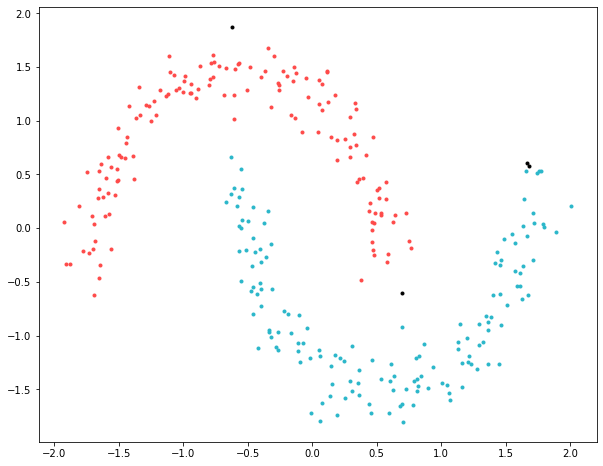

In [ ]:
custom_DBSCAN.visualize(X, point_labels, clusters)